The objective of this competition is to predict the amount of time 'Time from Pickup to Arrival' for each order.
This is a regression problem where we'll use regression-associated libraries for measuring the loss.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

In [2]:
train = pd.read_csv('C:/Users/Amine/Desktop/Sendy Logistics Challenge/Train.csv')
test = pd.read_csv('C:/Users/Amine/Desktop/Sendy Logistics Challenge/Test.csv')
variables = pd.read_csv('C:/Users/Amine/Desktop/Sendy Logistics Challenge/VariableDefinitions.csv')
riders = pd.read_csv('C:/Users/Amine/Desktop/Sendy Logistics Challenge/Riders.csv')

In [3]:
sublocations = pd.read_json('C:/Users/Amine/Desktop/Sendy Logistics Challenge/nairobi_sublocations.json')

In [4]:
 train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [5]:
variables.head()

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31


In [6]:
len(train)

21201

In [7]:
train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

Too many nulls in 'Precipitation' , only 1 thousand rows are not nulls. This row should be dropped. 'Temperature' has a considerable amoubt of nulls 4366 exactly. We can keep it and try to see if we can impute values or use it as is.

In [8]:
train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [9]:
#plt.pyplot.scatter(train['Temperature'],train['Time from Pickup to Arrival'])
#plot1 = train[(train['Temperature']>=15)&(train['Temperature']<=20)]
#plt.pyplot.scatter(plot1.Temperature,plot1['Time from Pickup to Arrival'])
#plot2 = train[(train['Temperature']>=20)&(train['Temperature']<=25)]
#plt.pyplot.scatter(plot2.Temperature,plot2['Time from Pickup to Arrival'])
#plot3 = train[(train['Temperature']>=25)&(train['Temperature']<=30)]
#plt.pyplot.scatter(plot3.Temperature,plot3['Time from Pickup to Arrival'])

In [10]:
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [11]:
#train.drop(columns=['Vehicle Type'],axis=1,inplace=True)
#train.dtypes

###### First lets concat the riders/train, and add the riders' infos to the train dataset.

In [12]:
train = pd.merge(train,riders,on='Rider Id',how='left')
test = pd.merge(test,riders,on='Rider Id',how='left')

### Exploratory Data Analysis

In [13]:
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings'],
      dtype='object')

###### Lets start with the temperature histogram

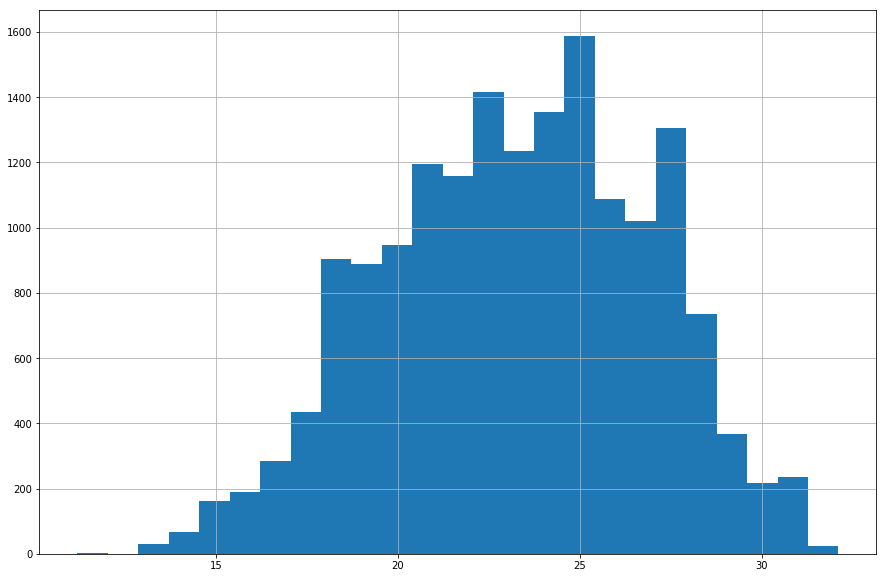

In [14]:
hist_temp = train.Temperature.hist(bins=25,figsize=[15,10])

The most common temperature is 25 degrees in Celsius.

###### Platform

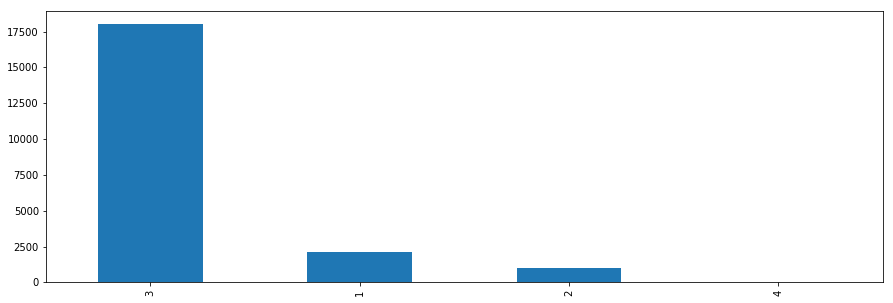

In [15]:
train['Platform Type'].value_counts().plot(kind='bar',figsize=[15,5])

###### Personal or Business

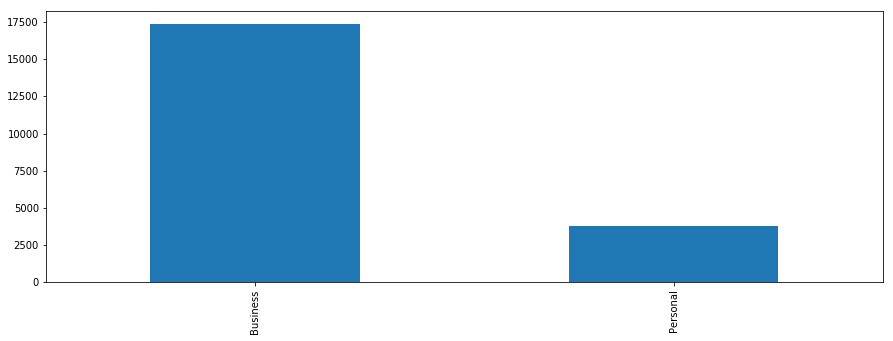

In [16]:
train['Personal or Business'].value_counts().plot(kind='bar',figsize=[15,5])

###### Arrival at Pickup Day of Month

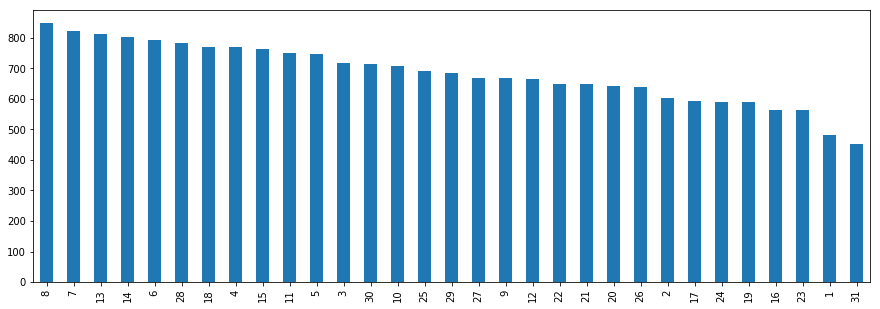

In [17]:
train['Arrival at Pickup - Day of Month'].value_counts().plot(kind='bar',figsize=[15,5])

###### Arrival at Pickup Weekday

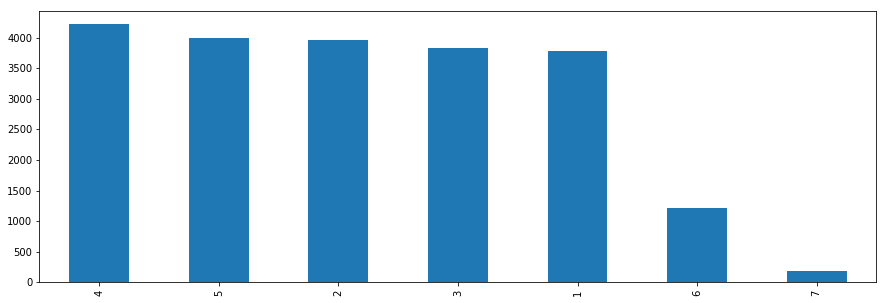

In [18]:
train['Arrival at Pickup - Weekday (Mo = 1)'].value_counts().plot(kind='bar',figsize=[15,5])

So the weekend is less busy compared to the other days. Something to keep in mind.

###### Lets extract the hour/minute/seconds from the Arrival Pickup Time.

In [19]:
train['Pickup - Time'] = pd.to_datetime(train['Pickup - Time'])
train['Arrival at Destination - Time'] = pd.to_datetime(train['Arrival at Destination - Time'])

In [20]:
train['Pickup_Hour'] = train['Pickup - Time'].dt.hour
train['Pickup_Minutes'] = train['Pickup - Time'].dt.minute
train['Pickup_Seconds'] = train['Pickup - Time'].dt.second
train['Arrival_Destination_Hour'] = train['Arrival at Destination - Time'].dt.hour
train['Arrival_Destination_Minutes'] = train['Arrival at Destination - Time'].dt.minute
train['Arrival_Destination_Seconds'] = train['Arrival at Destination - Time'].dt.second

###### lets plot the hours at pickup.

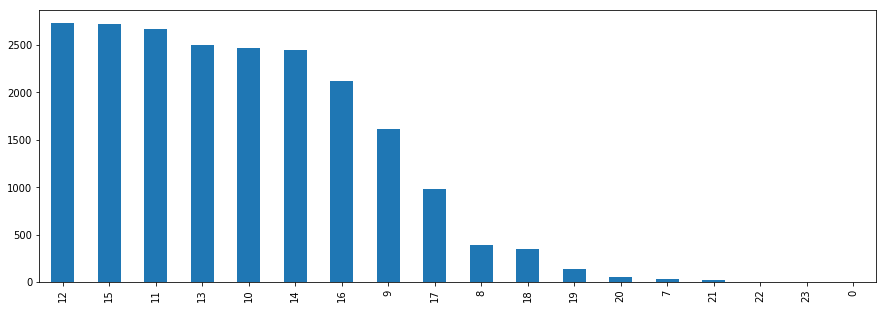

In [21]:
train['Pickup_Hour'].value_counts().plot(kind='bar',figsize=[15,5])

Most of pickup hours are from 9 AM till 19-21 PM, heavily concentrated in the morning & afternoon

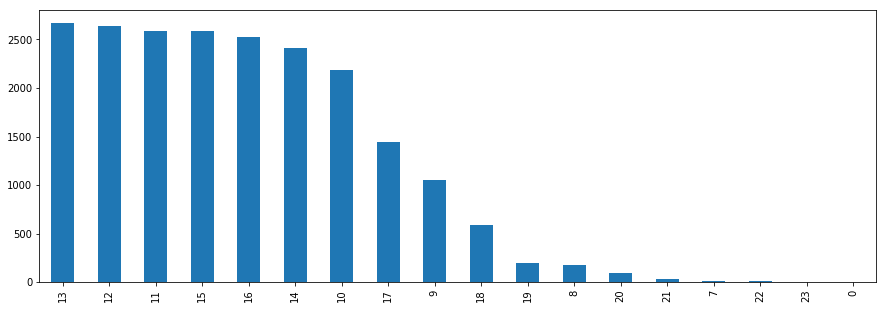

In [22]:
train['Arrival_Destination_Hour'].value_counts().plot(kind='bar',figsize=[15,5])

The destination Arrival hours seems to match the Pickup Hours.

In [23]:
## convert target from seconds to minutes.
train['Time_from_Pickup_to_Arrival_Minutes'] = train['Time from Pickup to Arrival']/60

we will plot the target distribution later in minutes and seconds for easier interpretation.

###### The most important variable : Distance (KM)

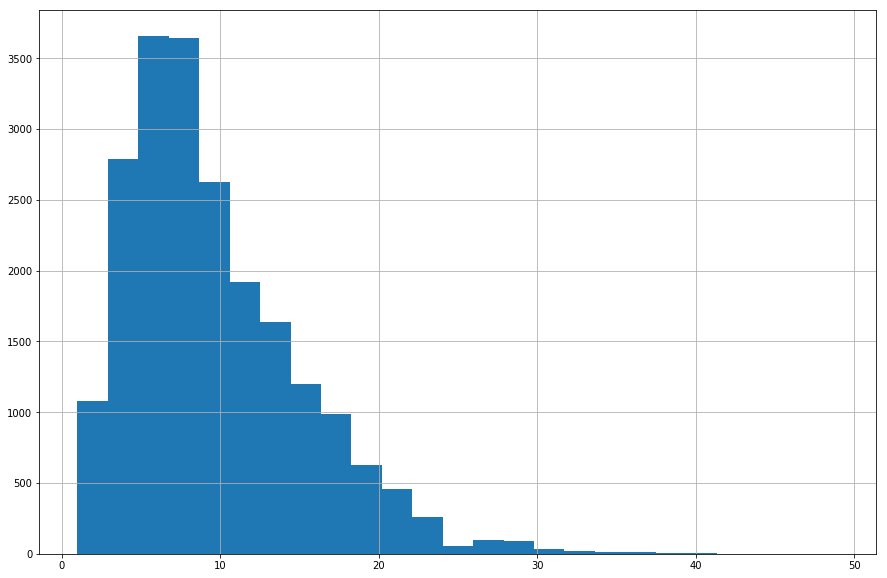

In [24]:
hist_temp = train['Distance (KM)'].hist(bins=25,figsize=[15,10])

Most of the rides are under 15 KM.

###### Speed?

Something useful we could do, is to generate a feature 'Speed' of each order. Set up a threshold of acceptable speed of a bike, and eliminate the possible outliers later. Lets generate it.

###### Breaking down distance to meters and keep time in seconds, and convert it to minutes

In [25]:
train['Speed_Meter_per_Second'] = (train['Distance (KM)']*1000)/train['Time from Pickup to Arrival'] ##meter per second
#train['Speed_Meter_per_Minute'] = (train['Distance (KM)']*1000)/train['Time_from_Pickup_to_Arrival_Minutes'] ## meter per minute

In [26]:
train.Speed_Meter_per_Second.describe()

count    21201.000000
mean        69.251494
std        529.249252
min          0.255624
25%          4.573171
50%          6.406834
75%          8.413462
max      17000.000000
Name: Speed_Meter_per_Second, dtype: float64

###### Outlier Free Speed

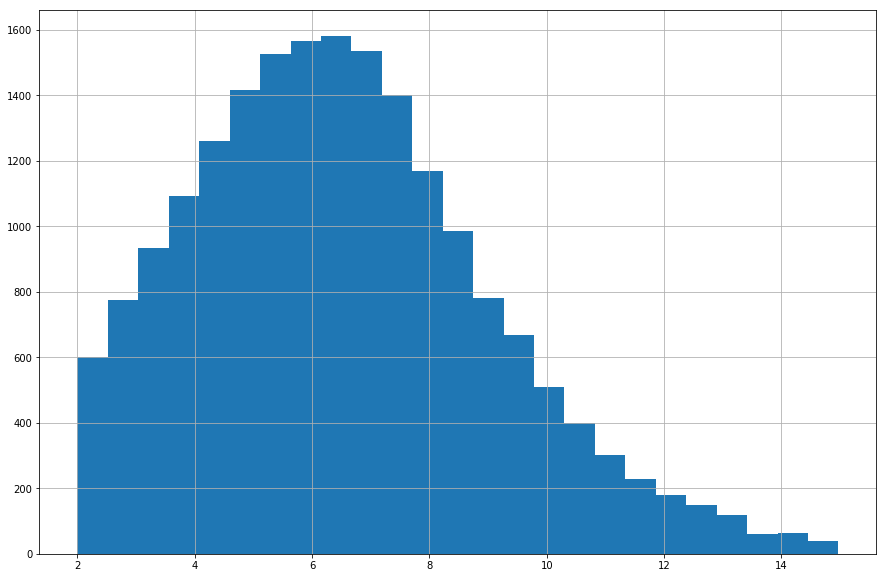

In [27]:
OutliersTrain = train[(train.Speed_Meter_per_Second>=15)|(train.Speed_Meter_per_Second<=2)]#.sort_values(by='Speed_Meter_per_',ascending=False)
OutlierFreeTrain = train[~(train['Order No'].isin(OutliersTrain['Order No']))]
hist_Speedmin = OutlierFreeTrain['Speed_Meter_per_Second'].hist(bins=25,figsize=[15,10])

Speed's distribution when outliers are excluded from the data.

In [28]:
print('We have probably %i outliers , we might have classified a few normal ones as outliers though.'%(len(OutliersTrain)))

We have probably 1856 outliers , we might have classified a few normal ones as outliers though.


In [29]:
OutlierFreeTrain.Speed_Meter_per_Second.describe()

count    19345.000000
mean         6.517542
std          2.506272
min          2.000667
25%          4.662005
50%          6.324111
75%          8.064516
max         14.970060
Name: Speed_Meter_per_Second, dtype: float64

###### Riders stuff

Let's get the ID's of the riders that cause these outliers and see if there's a trend.

In [30]:
plot1=train[train['Speed_Meter_per_Second']>=15]
#plot1.groupby('Rider Id').agg('count').sort_values(by='Order No',ascending=False)
riders['WrongOrders'] = riders['Rider Id'].map(plot1.groupby('Rider Id').agg('count').sort_values(by='Order No',ascending=False)['Order No'])
#riders['error_rate'] = riders['WrongOrders']/riders['No_Of_Orders']

In [31]:
train['Total_Orders'] = train['Rider Id'].map(train.groupby('Rider Id').agg('count')['Order No'])
train = pd.merge(train,riders.drop(['No_of_Ratings','Average_Rating','Age','No_Of_Orders'],axis=1),on='Rider Id',how='left')
test = pd.merge(test,riders.drop(['No_of_Ratings','Average_Rating','Age','No_Of_Orders'],axis=1),on='Rider Id',how='left')
train['error_rate_rider'] = train['WrongOrders']/train['Total_Orders']
test['error_rate_rider'] = test['Rider Id'].map(train['error_rate_rider'])

In [32]:
len(train[train.error_rate_rider>=0.5])

506

Do the train and test sets share the same riders? lets see.

In [33]:
print('Number of unique riders in train set : %i and in test set : %i '%(len(train['Rider Id'].unique()),len(test['Rider Id'].unique())))

Number of unique riders in train set : 924 and in test set : 822 


In [34]:
riderstrainonly = len(train[~(train['Rider Id'].isin(test['Rider Id'].unique()))]['Rider Id'].unique())
riderstestonly = len(test[~(test['Rider Id'].isin(train['Rider Id'].unique()))]['Rider Id'].unique())
print('Number of riders existing only in trainset? %i ; Number of riders only in test set? %i ' %(riderstrainonly,riderstestonly))

Number of riders existing only in trainset? 130 ; Number of riders only in test set? 28 


###### always late riders?

In [35]:
idxlate=train[train.Speed_Meter_per_Second<=2][['Distance (KM)','Speed_Meter_per_Second','Time from Pickup to Arrival','Time_from_Pickup_to_Arrival_Minutes']].index
train.iloc[idxlate]['Rider Id'].value_counts().head(5)

Rider_Id_268    14
Rider_Id_88     10
Rider_Id_660     8
Rider_Id_362     8
Rider_Id_519     8
Name: Rider Id, dtype: int64

In [36]:
print('We have %i orders that took too long to reach its destination. '%(len(train[train.Speed_Meter_per_Second<2])))

We have 684 orders that took too long to reach its destination. 


In [37]:
train[(train.Speed_Meter_per_Second<=2)]

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup_Minutes,Pickup_Seconds,Arrival_Destination_Hour,Arrival_Destination_Minutes,Arrival_Destination_Seconds,Time_from_Pickup_to_Arrival_Minutes,Speed_Meter_per_Second,Total_Orders,WrongOrders,error_rate_rider
19,Order_No_19866,User_Id_3722,Bike,1,Personal,28,2,2:12:53 PM,28,2,...,50,7,16,0,27,70.333333,1.184834,41,NaN,NaN
24,Order_No_4818,User_Id_2030,Bike,3,Business,11,2,3:38:33 PM,11,2,...,53,17,16,53,34,60.283333,0.829417,16,NaN,NaN
29,Order_No_13398,User_Id_2383,Bike,3,Business,28,3,8:33:07 AM,28,3,...,45,10,8,57,3,11.883333,1.402525,28,NaN,NaN
70,Order_No_27629,User_Id_598,Bike,1,Business,21,1,5:35:02 PM,21,1,...,55,28,18,41,54,46.433333,1.435750,21,NaN,NaN
182,Order_No_6581,User_Id_432,Bike,3,Business,20,1,6:26:07 PM,20,1,...,18,44,20,10,48,52.066667,0.960307,27,1.0,0.037037
189,Order_No_4298,User_Id_2123,Bike,1,Personal,15,1,9:22:26 AM,15,1,...,2,13,10,32,32,30.316667,1.649258,53,NaN,NaN
212,Order_No_19647,User_Id_1304,Bike,3,Business,15,4,4:03:45 PM,15,4,...,22,53,16,48,44,25.850000,1.934236,10,NaN,NaN
258,Order_No_504,User_Id_677,Bike,3,Business,16,2,2:30:46 PM,16,2,...,31,11,16,18,21,47.166667,1.060071,52,1.0,0.019231
276,Order_No_18347,User_Id_635,Bike,3,Business,18,4,2:23:52 PM,18,4,...,47,38,15,0,3,12.416667,1.342282,7,NaN,NaN
279,Order_No_14911,User_Id_3091,Bike,3,Business,25,1,9:05:47 AM,25,1,...,56,35,10,53,20,56.750000,1.468429,22,1.0,0.045455


In [38]:
latetrain = train[(train.Speed_Meter_per_Second<=2)].copy()
latetrain.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Pickup_Minutes,Pickup_Seconds,Arrival_Destination_Hour,Arrival_Destination_Minutes,Arrival_Destination_Seconds,Time_from_Pickup_to_Arrival_Minutes,Speed_Meter_per_Second,Total_Orders,WrongOrders,error_rate_rider
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,...,686.000000,686.000000,686.00000,686.000000,686.000000,686.000000,686.000000,686.000000,390.000000,390.000000
mean,2.846939,16.083090,3.269679,16.083090,3.269679,16.083090,3.269679,16.083090,3.269679,16.083090,...,28.641399,29.865889,14.01895,28.244898,30.625364,45.884378,1.500983,55.889213,3.841026,0.070989
std,0.516768,8.825499,1.515424,8.825499,1.515424,8.825499,1.515424,8.825499,1.515424,8.825499,...,17.318055,17.264100,2.46279,17.196115,17.151226,24.879846,0.382987,46.450815,5.101072,0.067270
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,8.00000,0.000000,0.000000,8.333333,0.255624,1.000000,1.000000,0.007937
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,...,13.000000,15.000000,12.00000,13.000000,17.000000,25.712500,1.269539,21.000000,1.000000,0.021685
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,...,28.000000,31.000000,14.00000,28.000000,30.000000,44.566667,1.576045,41.000000,2.000000,0.050847
75%,3.000000,24.000000,5.000000,24.000000,5.000000,24.000000,5.000000,24.000000,5.000000,24.000000,...,44.000000,44.000000,16.00000,42.000000,46.000000,63.616667,1.811594,77.000000,4.000000,0.095238
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,...,59.000000,59.000000,22.00000,59.000000,59.000000,128.566667,2.000000,247.000000,31.000000,0.419355


In [39]:
fasttrain= train[(train.Speed_Meter_per_Second>=15)].copy()
fasttrain.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Pickup_Minutes,Pickup_Seconds,Arrival_Destination_Hour,Arrival_Destination_Minutes,Arrival_Destination_Seconds,Time_from_Pickup_to_Arrival_Minutes,Speed_Meter_per_Second,Total_Orders,WrongOrders,error_rate_rider
count,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,...,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
mean,2.938462,15.844444,3.198291,15.844444,3.198291,15.844444,3.198291,15.844444,3.198291,15.844444,...,29.411111,29.100855,13.136752,29.548718,30.923932,2.783376,1146.230250,50.188034,12.153846,0.298131
std,0.332923,8.843264,1.564686,8.843264,1.564686,8.843264,1.564686,8.843264,1.564686,8.843264,...,17.031528,17.048517,2.574156,17.034854,17.153218,5.155317,1962.382353,38.790290,11.757687,0.255342
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,15.000000,1.000000,1.000000,0.007937
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,...,15.000000,15.000000,11.000000,15.000000,16.000000,0.066667,32.609038,23.000000,3.000000,0.086957
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,...,29.000000,28.000000,13.000000,29.000000,31.000000,0.225000,285.714286,42.000000,7.000000,0.196078
75%,3.000000,24.000000,4.000000,24.000000,4.000000,24.000000,4.000000,24.000000,4.000000,24.000000,...,44.000000,44.000000,15.000000,44.000000,46.000000,3.187500,1333.333333,63.500000,19.000000,0.565217
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,...,59.000000,59.000000,22.000000,59.000000,59.000000,37.400000,17000.000000,247.000000,40.000000,1.000000


###### Age binning

In [40]:
train['Age_Year'] = train['Age']/365
train['Age_Month'] = train['Age']/30
train['Age_Year']=round(train['Age_Year'])
train['Age_Month'] = round(train['Age_Month'])

###### Rush hours

In [41]:
len(train)

21201

In [42]:
train.Pickup_Hour.value_counts()

12    2725
15    2720
11    2669
13    2493
10    2459
14    2443
16    2121
9     1606
17     984
8      385
18     343
19     138
20      53
7       34
21      22
22       4
23       1
0        1
Name: Pickup_Hour, dtype: int64

In [43]:
train.loc[(train['Pickup_Hour']>=7)&(train['Pickup_Hour']<9),'DayTime']= 'Rush_Hour1'
train.loc[(train['Pickup_Hour']>=9)&(train['Pickup_Hour']<=11),'DayTime']= 'Matin'
train.loc[(train['Pickup_Hour']>11)&(train['Pickup_Hour']<=13),'DayTime']= '9ayla'
train.loc[(train['Pickup_Hour']>13)&(train['Pickup_Hour']<17),'DayTime']= 'ApresMidi'
train.loc[(train['Pickup_Hour']>=17)&(train['Pickup_Hour']<=19),'DayTime']= 'Rush_Hour2'
train.loc[(train['Pickup_Hour']>19)&(train['Pickup_Hour']<7),'DayTime']= 'Night'

In [44]:
len(train[train['DayTime']=='Rush_Hour2'])

1465

In [45]:
len(train[train['DayTime']=='Rush_Hour1'])

419

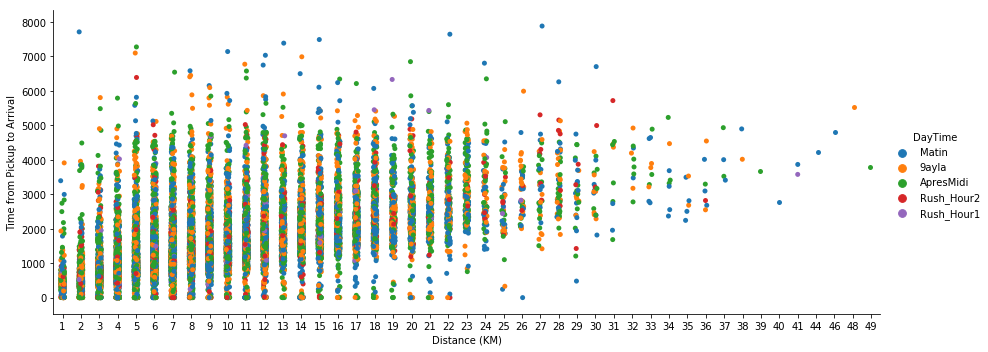

In [46]:
g = sns.catplot(x="Distance (KM)", y="Time from Pickup to Arrival",hue="DayTime",
                   data=train, aspect=2.5, height=5, ci=80.0)

In [47]:
def weekend(x):
    if x not in (6,7):
        x=0
    else:
        x=1
    return(x)        

In [48]:
train['Weekend']=train['Arrival at Pickup - Weekday (Mo = 1)'].apply(weekend)

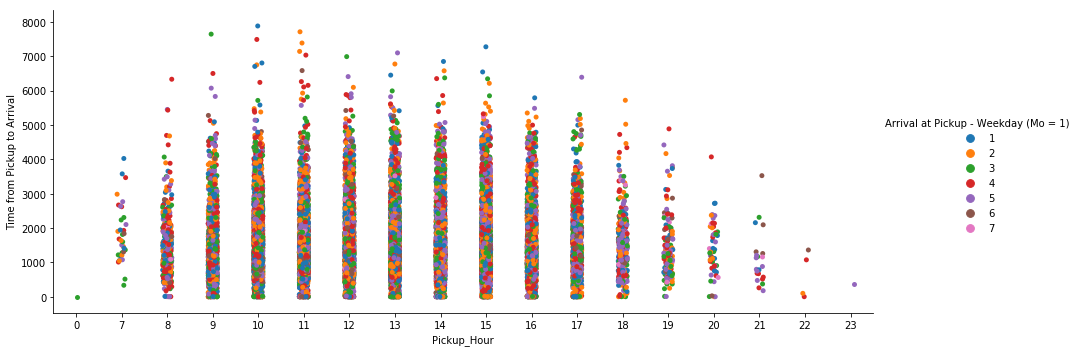

In [49]:
g = sns.catplot(x="Pickup_Hour", y="Time from Pickup to Arrival",hue="Arrival at Pickup - Weekday (Mo = 1)",
                   data=train, aspect=2.5, height=5, ci=80.0)

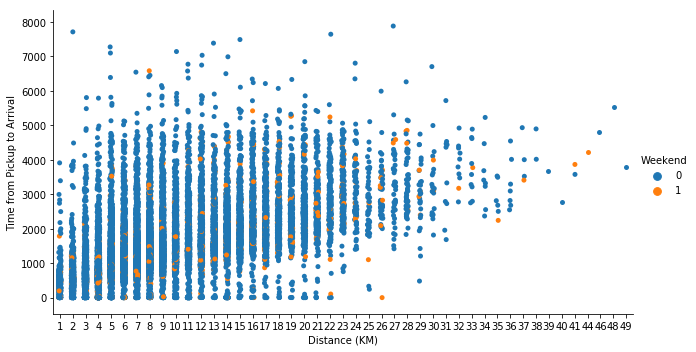

In [50]:
g = sns.catplot(x="Distance (KM)", y="Time from Pickup to Arrival",hue="Weekend",#col='Weekend',
                   data=train, aspect=1.8, height=5, ci=80)

In [51]:
### test[pd.to_datetime(test['Pickup - Time']).dt.hour==23]

In [52]:
#from arcgis.gis import GIS
#gis = GIS()#"https://www.arcgis.com", "belaminemedamine", "mazlout12")
#m = gis.map('Nairobi')
#m

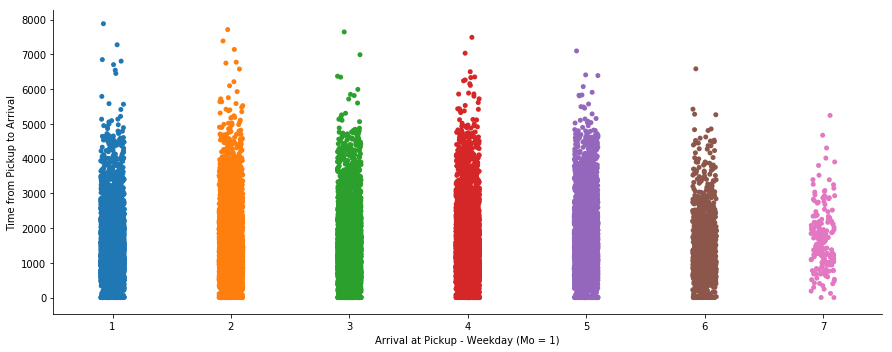

In [53]:
g = sns.catplot(x="Arrival at Pickup - Weekday (Mo = 1)", y="Time from Pickup to Arrival",#hue="",
                   data=train, aspect=2.5, height=5, ci=80.0)

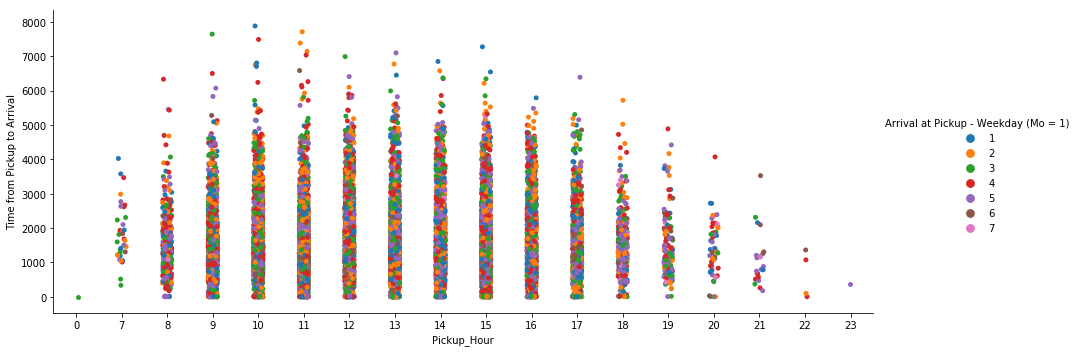

In [54]:
g = sns.catplot(x="Pickup_Hour", y="Time from Pickup to Arrival",hue="Arrival at Pickup - Weekday (Mo = 1)",
                   data=train, aspect=2.5, height=5, ci=80.0)

In [55]:
train[train['Time from Pickup to Arrival']>=5000]['Distance (KM)'].value_counts()

9     8
20    8
18    7
12    7
5     7
15    7
10    6
11    6
16    5
8     5
13    4
22    4
19    4
14    3
17    3
7     3
24    3
6     3
28    3
27    2
3     2
21    2
4     1
48    1
34    1
23    1
25    1
26    1
30    1
31    1
2     1
Name: Distance (KM), dtype: int64

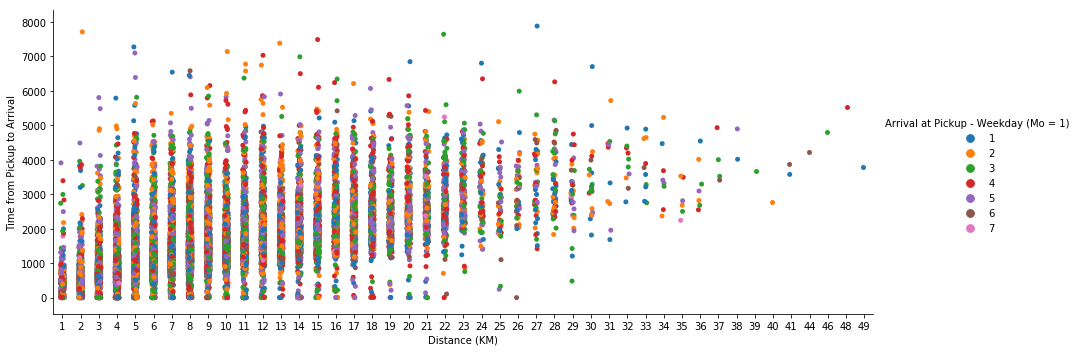

In [56]:
g = sns.catplot(x="Distance (KM)", y="Time from Pickup to Arrival",hue="Arrival at Pickup - Weekday (Mo = 1)",
                   data=train, aspect=2.5, height=5, ci=80.0)

#### Feature Generation : Categorical ( pickup point and destination point and an interaction )

In [57]:
train['pos_pickup'] = train['Pickup Long'].apply(str)+'_'+train['Pickup Lat'].apply(str)
train['pos_dest'] = train['Destination Long'].apply(str)+'_'+train['Pickup Lat'].apply(str)
test['pos_pickup'] = test['Pickup Long'].apply(str)+'_'+test['Pickup Lat'].apply(str)
test['pos_dest'] = test['Destination Long'].apply(str)+'_'+test['Pickup Lat'].apply(str)
train['from_to']= train['pos_pickup']+'_'+train['pos_dest']
test['from_to']= test['pos_pickup']+'_'+test['pos_dest']

In [58]:
fasttrain= train[(train.Speed_Meter_per_Second>=15)].copy()
latetrain=train[(train.Speed_Meter_per_Second<=2)].copy()

In [59]:
longtime=train[train['Time from Pickup to Arrival']>=5000].copy()
lontime=train[train['Time from Pickup to Arrival']<5000].copy()

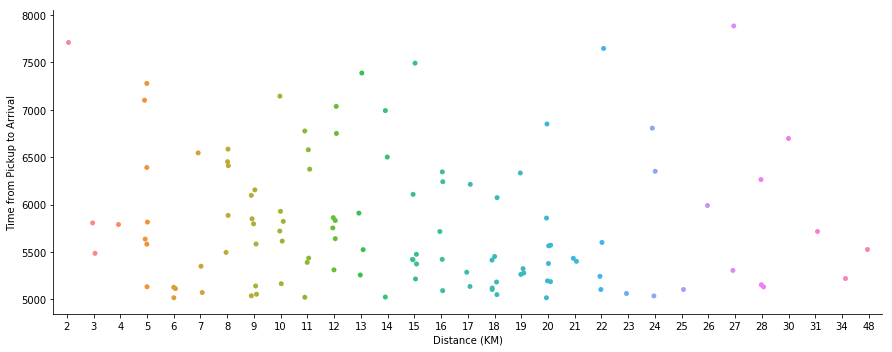

In [60]:
g = sns.catplot(x="Distance (KM)", y="Time from Pickup to Arrival",#col="cluster_destination",
                   data=longtime, aspect=2.5, height=5, ci=80.0)

In [61]:
longtime['Speed'] = (longtime['Distance (KM)']*1000)/(longtime['Time from Pickup to Arrival'])

In [62]:
longtime[longtime.Speed>=5]

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,WrongOrders,error_rate_rider,Age_Year,Age_Month,DayTime,Weekend,pos_pickup,pos_dest,from_to,Speed
129,Order_No_7095,User_Id_265,Bike,3,Business,14,4,12:57:17 PM,14,4,...,2.0,0.117647,3.0,41.0,9ayla,0,36.828195_-1.300921,37.016779299999996_-1.300921,36.828195_-1.300921_37.016779299999996_-1.300921,8.679928
327,Order_No_10651,User_Id_1271,Bike,3,Business,3,5,4:14:44 PM,3,5,...,1.0,0.035714,3.0,40.0,Rush_Hour2,0,36.897791999999995_-1.3244885,36.900920500000005_-1.3244885,36.897791999999995_-1.3244885_36.9009205000000...,5.431620
2047,Order_No_12073,User_Id_3238,Bike,3,Business,29,3,1:21:35 PM,29,3,...,NaN,NaN,1.0,7.0,9ayla,0,36.7782792_-1.2454537,36.782965999999995_-1.2454537,36.7782792_-1.2454537_36.782965999999995_-1.24...,5.454900
14558,Order_No_7222,User_Id_2828,Bike,3,Business,6,2,6:26:05 PM,6,2,...,NaN,NaN,2.0,21.0,Rush_Hour2,0,36.7928732_-1.2615888000000002,36.69308_-1.2615888000000002,36.7928732_-1.2615888000000002_36.69308_-1.261...,5.419580
15070,Order_No_25590,User_Id_3262,Bike,3,Personal,19,2,4:01:38 PM,19,2,...,NaN,NaN,1.0,16.0,ApresMidi,0,36.838724600000006_-1.2876007999999999,37.005025_-1.2876007999999999,36.838724600000006_-1.2876007999999999_37.0050...,6.499713
18537,Order_No_13311,User_Id_503,Bike,1,Business,22,3,4:37:38 PM,22,3,...,19.0,0.271429,5.0,67.0,Rush_Hour2,0,36.7000029_-1.3169591,36.8756811_-1.3169591,36.7000029_-1.3169591_36.8756811_-1.3169591,5.088579


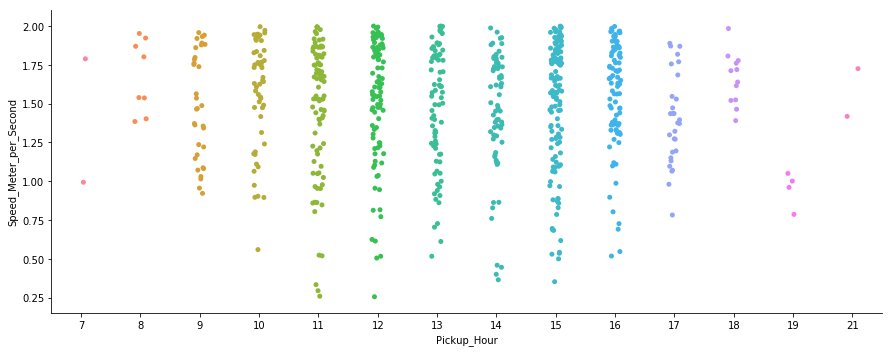

In [63]:
g = sns.catplot(x="Pickup_Hour", y="Speed_Meter_per_Second",#col="cluster_destination",
                   data=latetrain, aspect=2.5, height=5, ci=80.0)

In [64]:
#train['Pickup_Cluster_Hour'] = train['cluster_pickup'].apply(str)+'_'+train['Pickup_Hour'].apply(str)
#test['Pickup_Cluster_Hour'] = test['cluster_pickup'].apply(str)+'_'+test['Pickup_Hour'].apply(str)

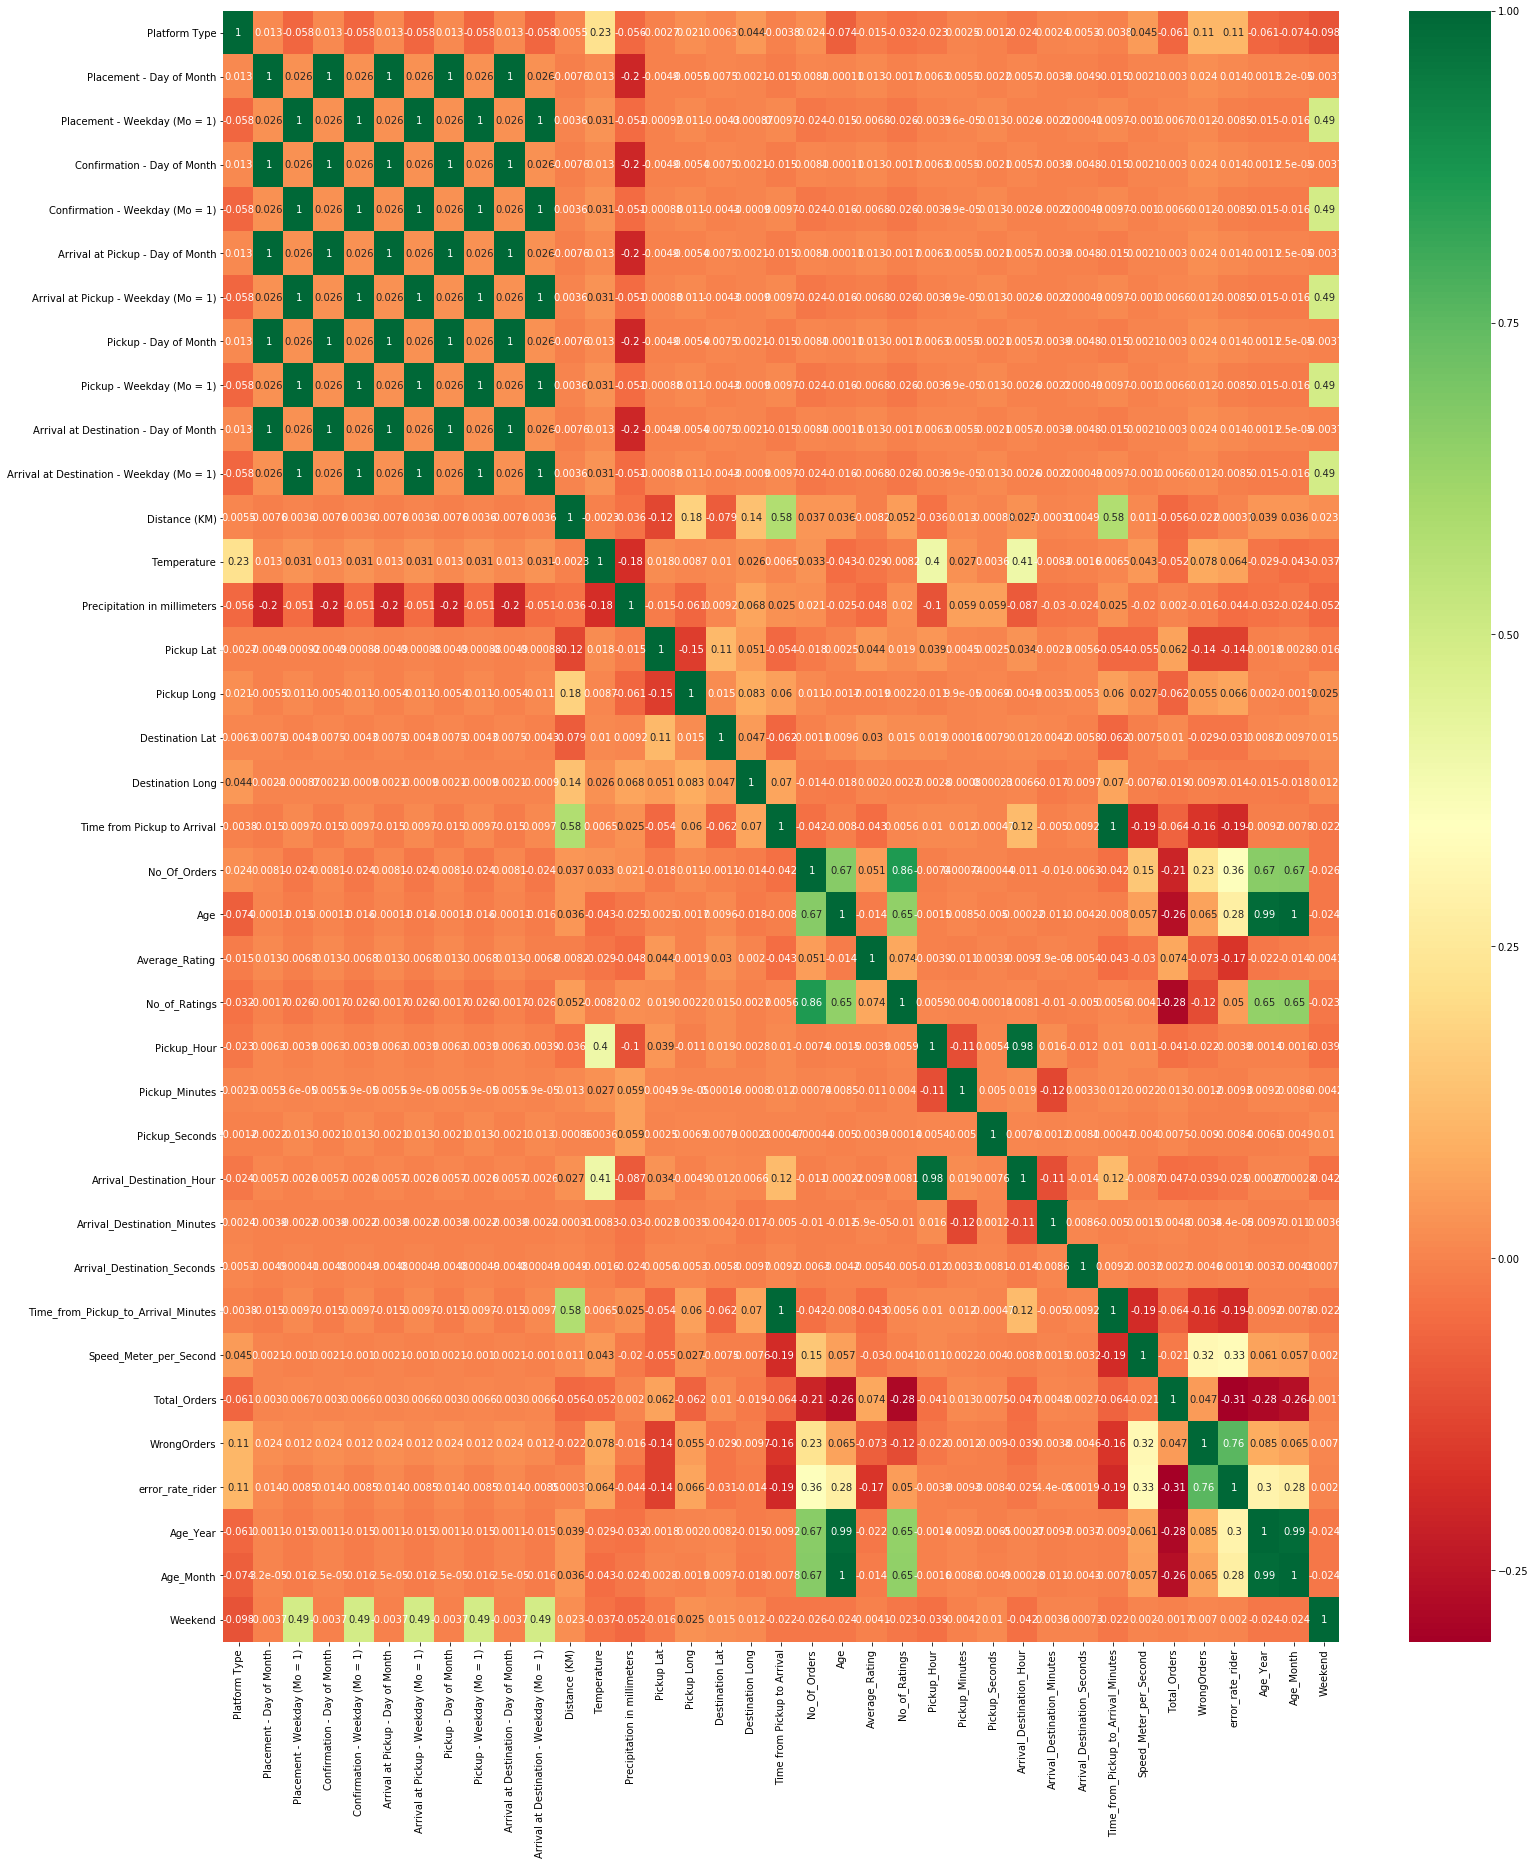

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import seaborn as sns



corrmat = train.corr()
top_corr_features = corrmat.index
#plt.figure(figsize=(20,20))
rcParams['figure.figsize'] = 25, 30
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [66]:
normaltrain = train[(train.Speed_Meter_per_Second>2) & (train.Speed_Meter_per_Second<15)]

##### Some EDA on 3 different portions of train

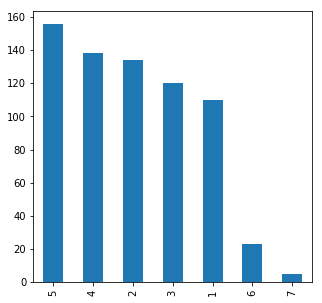

In [67]:
latetrain['Arrival at Destination - Weekday (Mo = 1)'].value_counts().plot(kind='bar',figsize=[5,5])

In [69]:
slowtrain=train[train.Speed_Meter_per_Second<=3].copy()

In [70]:
slowtrain[['Distance (KM)','Time from Pickup to Arrival']]['Time from Pickup to Arrival'].describe()

count    2000.000000
mean     2443.156000
std      1346.540965
min       334.000000
25%      1374.500000
50%      2282.000000
75%      3312.000000
max      7714.000000
Name: Time from Pickup to Arrival, dtype: float64

In [71]:
fasttrain['Distance (KM)'].value_counts()

4     164
3     117
5     109
2     104
8      91
11     70
14     60
6      59
7      58
9      48
10     45
1      41
12     33
15     26
13     23
17     20
16     18
18     14
20     14
21     13
19     11
22      9
23      5
24      3
25      3
27      3
29      3
31      2
26      1
28      1
30      1
35      1
Name: Distance (KM), dtype: int64